### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 7
### Due: Saturday, Apr 10th at 11.59pm CST
---

## Only one problem this week

This is a regression problem. Note of warning: the data I have provided have associated uncertainties, `yerr`. `sklearn` and `astroML` have different formats for using uncertainties; in `sklearn` fitting you can provide `sample_weight=1/yerr**2`, while in `astroML` fitting you can directly provide `y_error=yerr`.

1. Read in `hw7_data_1.npy`. The dataset should consist of $500$ samples. The first two columns are the two data features, `X`. The third column is the target labels, `y`, and the final column are the heteroscedastic uncertainties on the labels, `yerr`. Make a 2-panel scatter plot of the labels versus each feature.


2. Use multivariate linear regression on this data with its uncertainties (`astroML` rather than plain `sklearn` is the better option here). Print the best-fit intercept and slopes for the features. Make a prediction `Xgrid` over $50$ values from the min to the max value of each feature, and plot the best-fit model on a duplicate of the $2$-panel plot from (1); does this look like a good description of the data?


3. Make a new two-dimensional prediction meshgrid `Xgrid` over the $2$-D feature space, use your best-fit model to predict the labels, and make a $3$-D interactive plot showing the data and your best-fit over the entire space. You may find the following code useful.

In [1]:
# BS - commented this out just so I wouldn't keep getting 
# errors when running all of the cells

'''
# Makes the plot interactive. 
# You can pan the image.
%matplotlib notebook  
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(___, ___, y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.scatter(___.flatten(), ___.flatten(), ___, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)
''';


In [2]:
# To turn off interactive plotting
%matplotlib inline

4. Sticking with a linear model, now attempt a `GridSearchCV` procedure on the data to find the best `Ridge` regression hyper-parameters. Use the following `param_grid`:
```
ridge_params = {'alpha': [0.05,0.1,0.2,0.5,1.0], 'solver': ['svd', 'lsqr']}
```
What are the `best_params_` and the `best_score_` from this? Fit the data with the best options, and visualize interactively. Try `RidgeCV` also; what cross-validated `alpha_` does it return, and does this agree with `GridSeachCV`? *(Hint: remember to revert to inline matplotlib when you're done each time you make an interactive plot.)*


5. Perform Nadaraya-Watson regression on the data, using a Gaussian kernel with a bandwidth of $0.2$. Visualize interactively as before. How does this look compared to previous models?


6. Now model the data using Gaussian process regression and the default kernel. Check what the fit looks like with and with and without uncertainties accounted for. *(Hint: GPR in `sklearn` takes an `alpha` parameter equal to `(yerr/y)**2`.)*


7. Let's look finally at polynomial fitting. Fit a $4$th degree polynomial to the data. Print the best-fit regression coefficients, predict on the 2D meshgrid, and visualize interactively as before. How does this look compared to the linear model and GPR models?


8. Sticking with polynomial fitting, let's find the optimal hyper-parameters through cross-validation. 
- Using `sklearn.model_selection.train_test_split`, first do a train-test split with a `test_size` of $20\%$. Then split out a $20\%$ cross-validation set from the training set (leaving a somewhat smaller set to use for training). Note that you'll need to simultaneously split out `yerr` as well by just providing this as another array to `train_test_split`.
- Compute the training and cross-validation rms errors (and from those, the BIC values) as a function of polynomial degree from $1$ to $10$ inclusive. Plot the rms errors and BIC values as a function of the polynomial degree. 
- Choose the optimal polynomial degree, and train on all training data from the first `train_test_split` operation. Predict the labels of the held-out test set, and finally compute the testing rms error.

#### Part 1

In [ ]:
# BS - import all of the packages and data

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

data = np.load('/Users/smithwj/Box Sync/Astrostatistics/astr_8070_s21/coursework/homeworks/hw_data/hw7_data_1.npy')

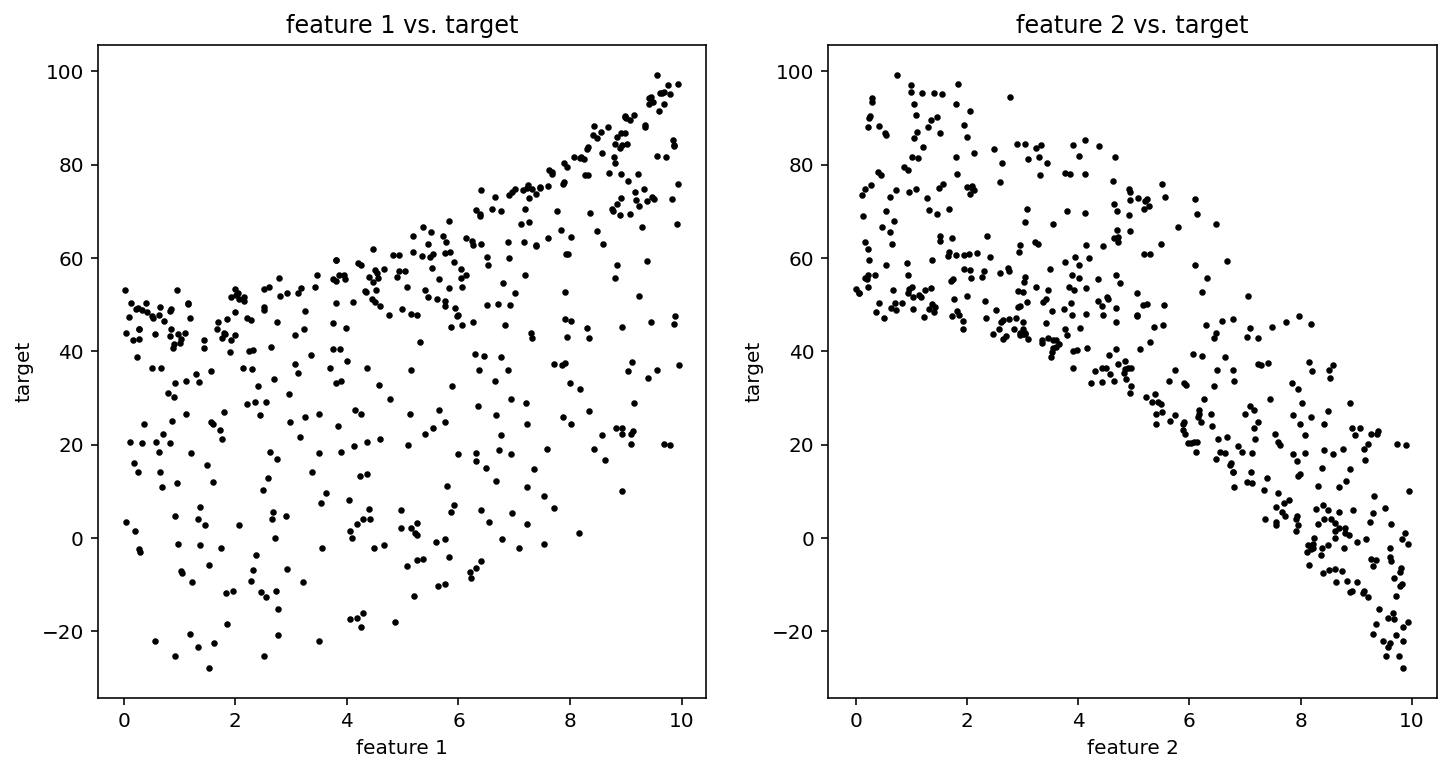

In [4]:
# BS - create two figures, one with each feature vs. the label

%matplotlib inline

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(data[:,0], data[:,2], s=5, c='k')
ax1.set_title("feature 1 vs. target")
ax1.set_xlabel('feature 1')
ax1.set_ylabel('target')

ax2.scatter(data[:,1], data[:,2], s=5, c='k')
ax2.set_title("feature 2 vs. target")
ax2.set_xlabel('feature 2')
ax2.set_ylabel('target')

plt.show()


SRT: Missing the uncertainties on the scatter plot of the data. -1

<IPython.core.display.Javascript object>


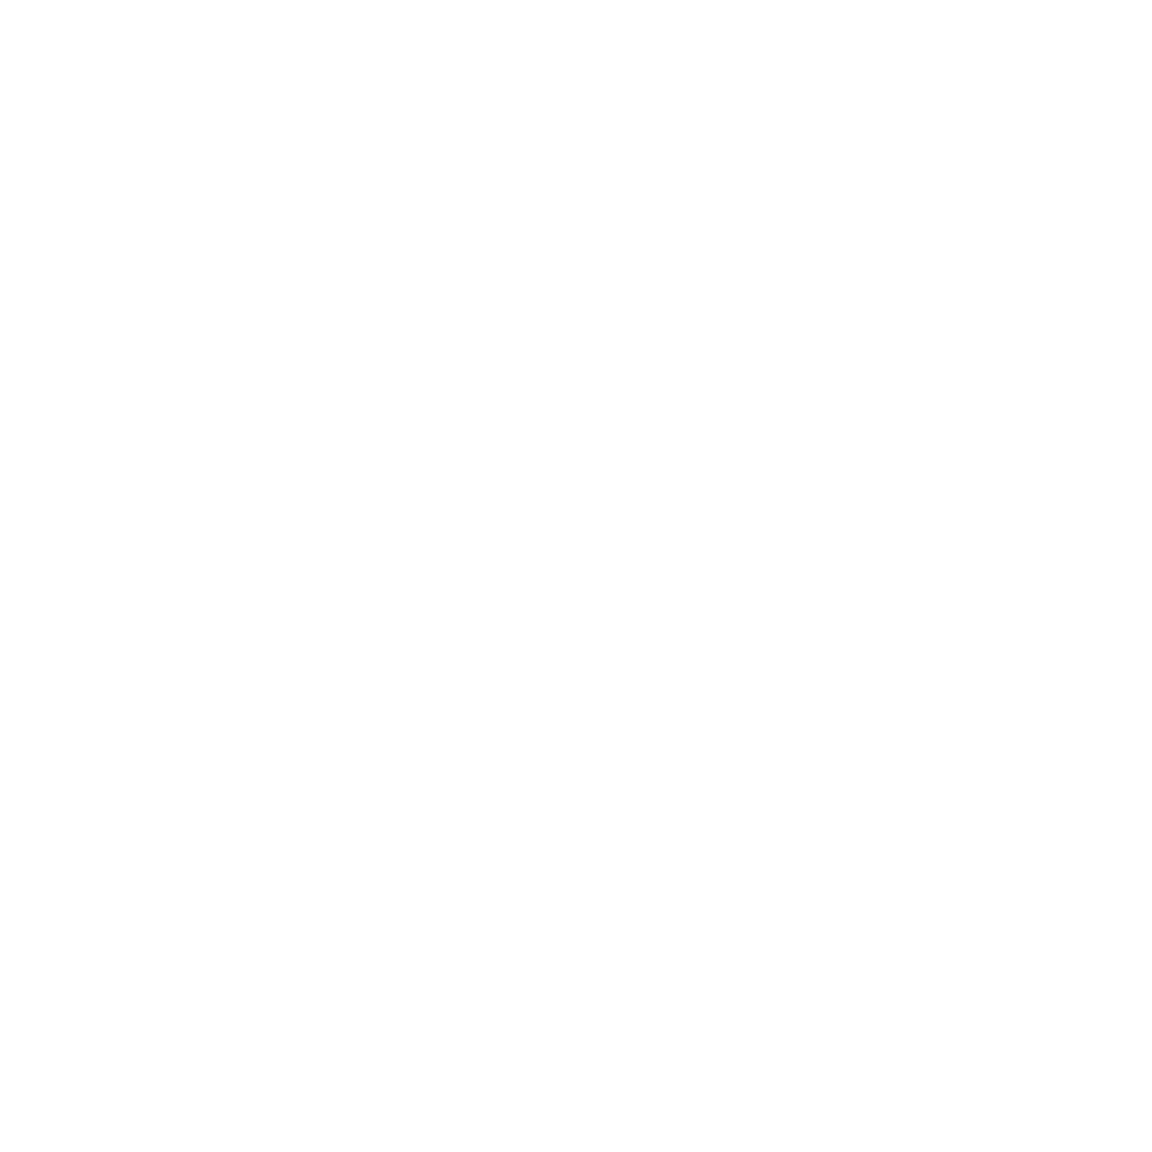

In [5]:
# BS - This wasn't explicitely asked for, but I wanted to test 
# the 3D plot with just the data to make sure I got it working 
# correctly and to see it. This is super cool, by the way.

%matplotlib notebook  

fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')


ax.plot(data[:,0], data[:,1], data[:,2], color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.set_title("both features vs. target")
ax.set_xlabel('feature 1', fontsize=12)
ax.set_ylabel('feature 2', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)


#### Part 2

In [27]:
# BS - revert to inline

%matplotlib inline

# BS - import the linear regression package from AstroML

from astroML.linear_model import LinearRegression

# BS - initialize the linear regression object
linear_model = LinearRegression()

# BS - separate the data into independent, dependent, and error arrays
X = data[:, 0:2]
y = data[:, 2]
dy = data[:, 3]

# BS - fit the linear model with X (ind), y (dep), and dy (err) and print coefficients
linear_model.fit(X, y, dy)

print("The best fit intercept is %.5f, and the best fit slopes are %.5f, and %.5f" 
                                                              %(linear_model.coef_[0],
                                                               linear_model.coef_[1],
                                                               linear_model.coef_[2]))


The best fit intercept is 57.10102, and the best fit slopes are 4.94873, and -8.30023


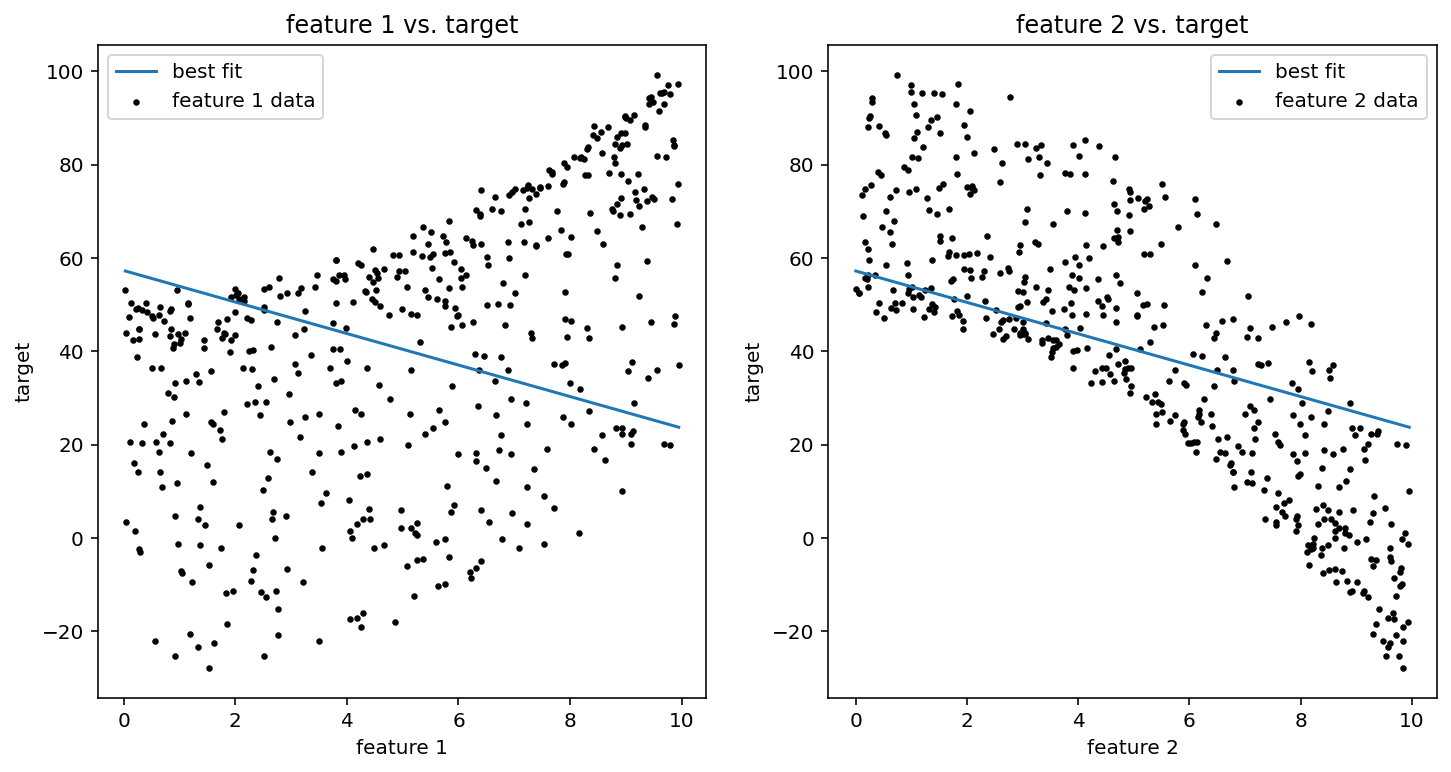

In [7]:

# BS - just to be safe
%matplotlib inline

# BS - create a 1D grid over each of the dimensions of each of the features
xgrid1 = np.linspace(np.min(data[:,0]), np.max(data[:,0]), 50)
xgrid2 = np.linspace(np.min(data[:,1]), np.max(data[:,1]), 50)

# BS - predict the target using each of the 1D features with its appropriate coefficient
yfit = linear_model.coef_[0] + linear_model.coef_[1]*xgrid1 + linear_model.coef_[2]*xgrid2


# BS - plot the data with the best fit in each of the dimensions separately
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121)

ax1.scatter(data[:,0], data[:,2], s=5, c='k', label='feature 1 data')
ax1.plot(xgrid1, yfit, label='best fit')
ax1.set_title("feature 1 vs. target")
ax1.set_xlabel('feature 1')
ax1.set_ylabel('target')

ax2 = fig.add_subplot(122)
ax2.scatter(data[:,1], data[:,2], s=5, c='k', label='feature 2 data')
ax2.plot(xgrid2, yfit, label='best fit')
ax2.set_title("feature 2 vs. target")
ax2.set_xlabel('feature 2')
ax2.set_ylabel('target')
ax1.legend()
ax2.legend()
plt.show()


Not a particularly good fit, though I'm not sure if I am fitting correctly...

SRT: The plotting of your fitted line didn't go quite right (although the fit itself is fine). You either needed to show the fit on each panel where the unshown feature is collapsed to its mean value (or alternatively set it to zero), or make a meshgrid to show the intersection through the solution hyperplane in each panel. -2 

#### Part 3

<IPython.core.display.Javascript object>


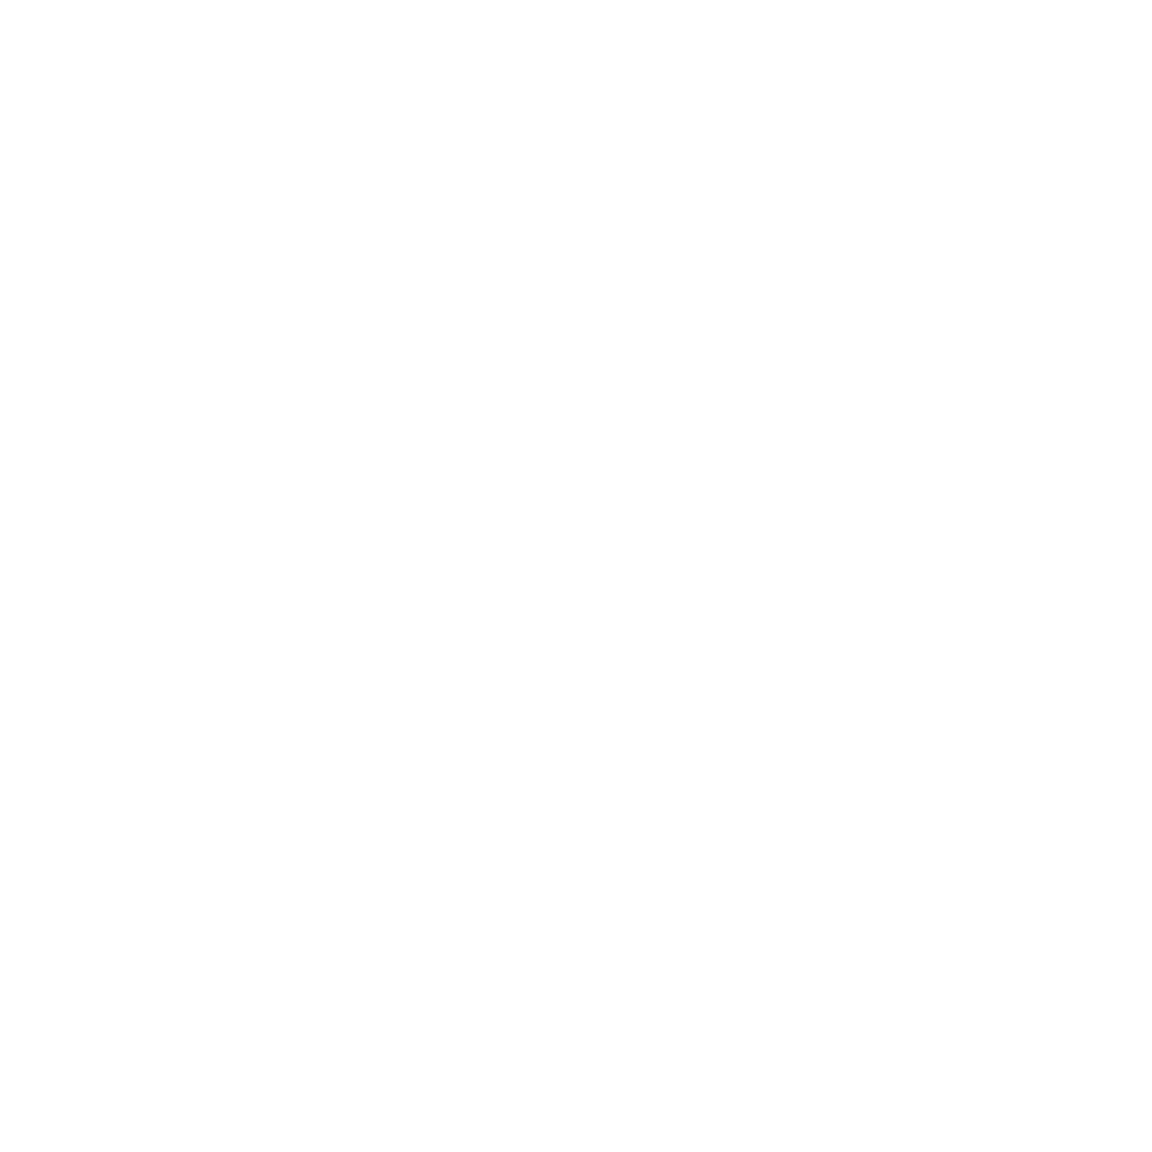

In [8]:
# BS - just to be safe
%matplotlib inline

# BS - create the meshgrid
xx1, xx2 = np.meshgrid(xgrid1, xgrid2)
mesh = np.vstack((xx1.flatten(), xx2.flatten())).T

# BS - reassign the data so I don't have to write out 'data' every time
X1 = data[:,0]
X2 = data[:,1]
y = data[:,2]

# BS - for each point on the mesh, fit the multivariable linear model
yfit = linear_model.coef_[0] + linear_model.coef_[1]*mesh[:,0] + linear_model.coef_[2]*mesh[:,1]

# BS - turn on 3D-ification
%matplotlib notebook  
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X1, X2, y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5, label='original data point')
ax.scatter(mesh[:,0], mesh[:,1], yfit, 
          facecolor=(0,0,0,0), s=20, 
          edgecolor='#70b3f0', label = 'predicted point (from mesh)')
ax.set_xlabel('feature 1', fontsize=12)
ax.set_ylabel('feature 2', fontsize=12)
ax.set_zlabel('Target', fontsize=12)
ax.set_title("Multivariate Linear Regression Fit")
ax.legend()
ax.view_init(elev=28, azim=120)


#### Part 4

best estimator is:  Ridge(solver='lsqr')
Best score is:  0.92918


<IPython.core.display.Javascript object>


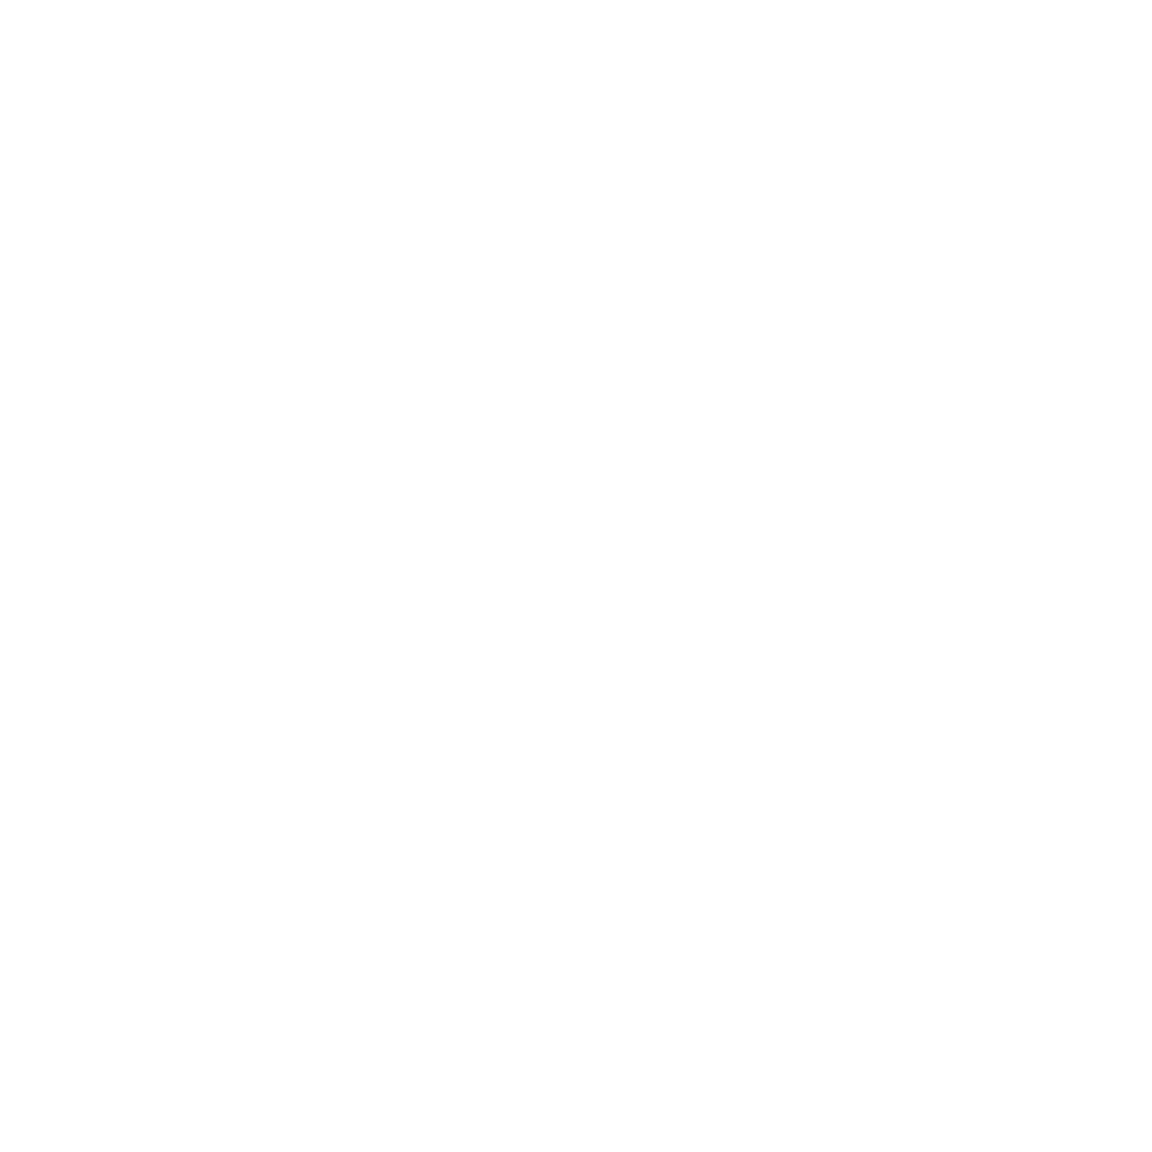

<IPython.core.display.Javascript object>


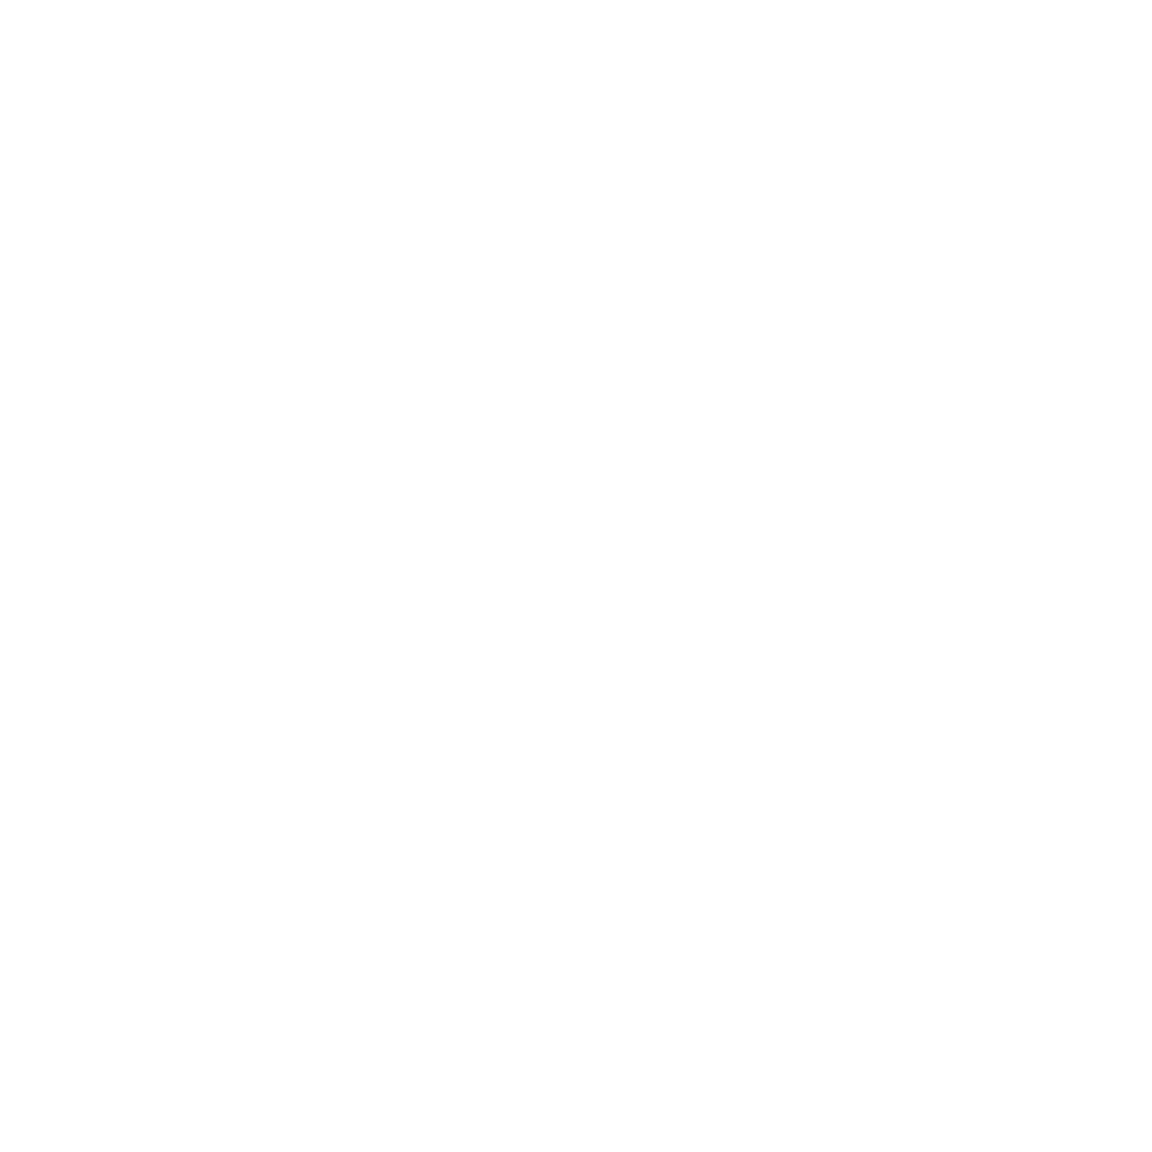

In [9]:
# BS - just to be safe
%matplotlib inline

# BS - import GridSearchCV and Ridge packages
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# BS - use the Ridge parameters suggested above
ridge_params = {'alpha': [0.05,0.1,0.2,0.5,1.0], 'solver': ['svd', 'lsqr']}
gs_model = Ridge()

# BS - use GridSearchCV to fit the data and find the best 
# estimator and best score
Ridge_gscv = GridSearchCV(gs_model, ridge_params)
Ridge_gscv.fit(X, y, sample_weight=1/dy**2)

print("best estimator is: ", Ridge_gscv.best_estimator_)
print("Best score is: ", np.round(Ridge_gscv.best_score_, 5))

# BS - fit the Ridge Regression to the data using the estimator
# and score from gridsearchCV
Ridge_model_gscv = Ridge(alpha=Ridge_gscv.best_score_, solver='lsqr')
Ridge_model_gscv.fit(X, y, sample_weight=1/dy**2)

# BS - predict the targets (both for just the individual data points and 
# over the whole mesh: I figured the assigment is asking for over the mesh but
# it was still a little ambiguous and I was curious about both)
y_pred_ridge_gscv = Ridge_model_gscv.predict(X)
y_pred_ridge_mesh_gscv = Ridge_model_gscv.predict(mesh)

# BS - turn on 3D-ification
%matplotlib notebook  

# BS - predictions for the original data
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X1, X2, y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5, label="original data")
ax.scatter(X1, X2, y_pred_ridge_gscv, 
          facecolor=(0,0,0,0), s=20, 
          edgecolor='#70b3f0', label="predicted target (only original data)")
ax.set_xlabel('feature 1', fontsize=12)
ax.set_ylabel('feature 2', fontsize=12)
ax.set_zlabel('Target', fontsize=12)
ax.set_title("Ridge regression from gridsearchCV, predicted on just original data")
ax.legend()

ax.view_init(elev=28, azim=120)
plt.show()

# BS - predictions for the whole mesh grid
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X1, X2, y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5, label="original data")

ax.scatter(mesh[:,0], mesh[:,1], y_pred_ridge_mesh_gscv, 
          facecolor=(0,0,0,0), s=20, 
          edgecolor='#70b3f0', label="predicted target (entire mesh)")

ax.set_title("Ridge regression from gridsearchCV, predicted on entire mesh")

ax.set_xlabel('feature 1', fontsize=12)
ax.set_ylabel('feature 2', fontsize=12)
ax.set_zlabel('Target', fontsize=12)
ax.legend()
ax.view_init(elev=28, azim=120)



SRT: It looks like you interpreted the "score" as the "alpha", but these are different. The score is the performance of the regressor, while the alpha is the level of regularization in the regressor itself. -1

RidgeCV best score is : 1.0


<IPython.core.display.Javascript object>


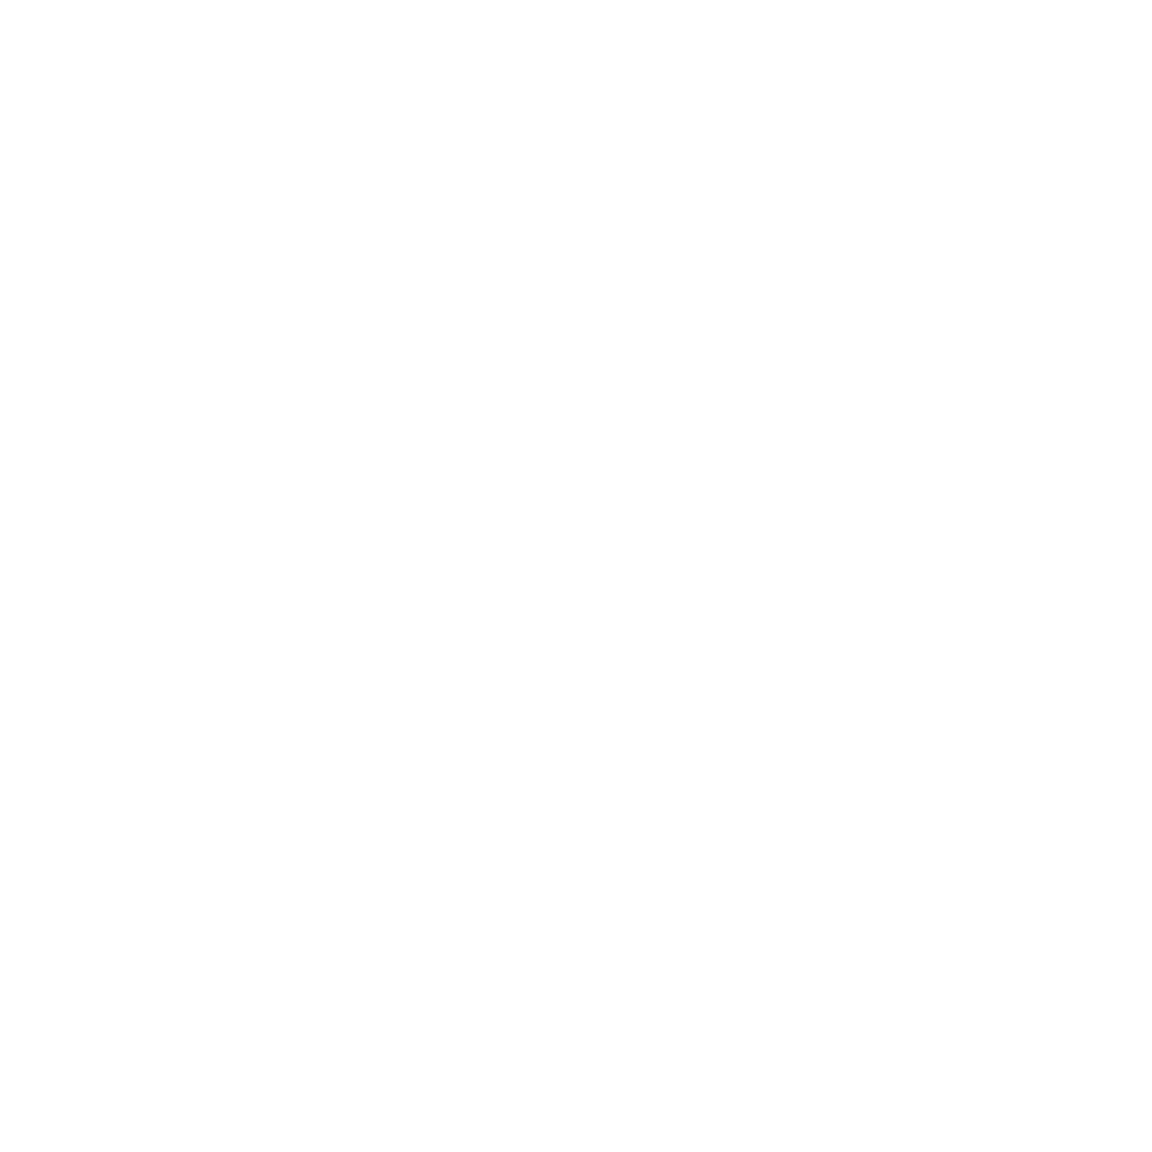

<IPython.core.display.Javascript object>


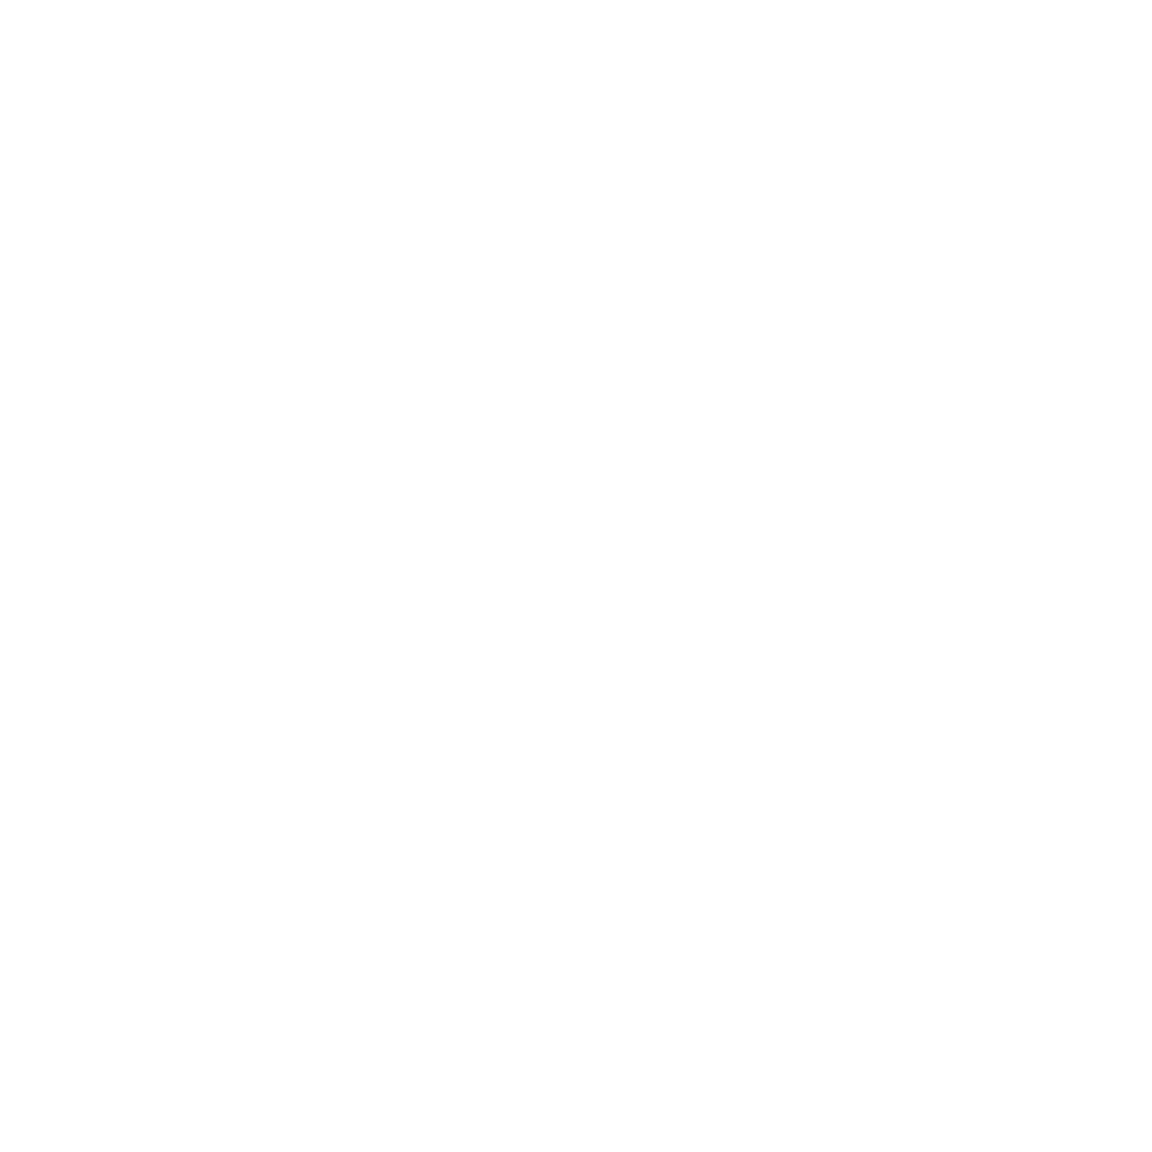

In [10]:
# BS - just to be safe
%matplotlib inline

# BS - now, instead of finding the parameters using gridsearchCV,
# find them using RidgeCV

# BS - import the package
from sklearn.linear_model import RidgeCV

# BS - create and fit the model
model_ridgecv = RidgeCV()
model_ridgecv.fit(X, y, sample_weight=1/dy**2)


print("RidgeCV best score is :", model_ridgecv.alpha_)
# BS - This gives a different value than from gridsearchCV
# I feel like that is an issue...

# BS - fit the ridge model with the RidgeCV parameters and same solver
Ridge_model_rcv = Ridge(alpha=model_ridgecv.alpha_, solver='lsqr')
Ridge_model_rcv.fit(X, y, sample_weight=1/dy**2)

# BS - fit the model for both data and mesh for RidgeCV
y_pred_ridgecv = Ridge_model_rcv.predict(X)
y_pred_ridgecv_mesh = Ridge_model_rcv.predict(mesh)


# BS - turn on 3D-ification
%matplotlib notebook 
 
    
# BS - predictions for the original data
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')
ax.plot(X1, X2, y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5, label="original data")

ax.scatter(X1, X2, y_pred_ridgecv, 
          facecolor=(0,0,0,0), s=20, 
          edgecolor='#70b3f0', label="predicted target (original data)")
ax.set_title("Ridge regression from RidgeCV, predicted on just original data")
ax.set_xlabel('feature 1', fontsize=12)
ax.set_ylabel('feature 2', fontsize=12)
ax.set_zlabel('Target', fontsize=12)
ax.legend()
ax.view_init(elev=28, azim=120)
plt.show()

# BS - predictions for the whole mesh
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X1, X2, y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5, label="original data")

ax.scatter(mesh[:,0], mesh[:,1], y_pred_ridgecv_mesh, 
          facecolor=(0,0,0,0), s=20, 
          edgecolor='#70b3f0', label="predicted target (entire mesh)")
ax.set_title("Ridge regression from RidgeCV, predicted on the whole mesh")
ax.set_xlabel('feature 1', fontsize=12)
ax.set_ylabel('feature 2', fontsize=12)
ax.set_zlabel('Target', fontsize=12)
ax.legend()
ax.view_init(elev=28, azim=120)
plt.show()

SRT: You got the alpha right this time, and it's only different from above because score and alpha were conflated above.

<IPython.core.display.Javascript object>


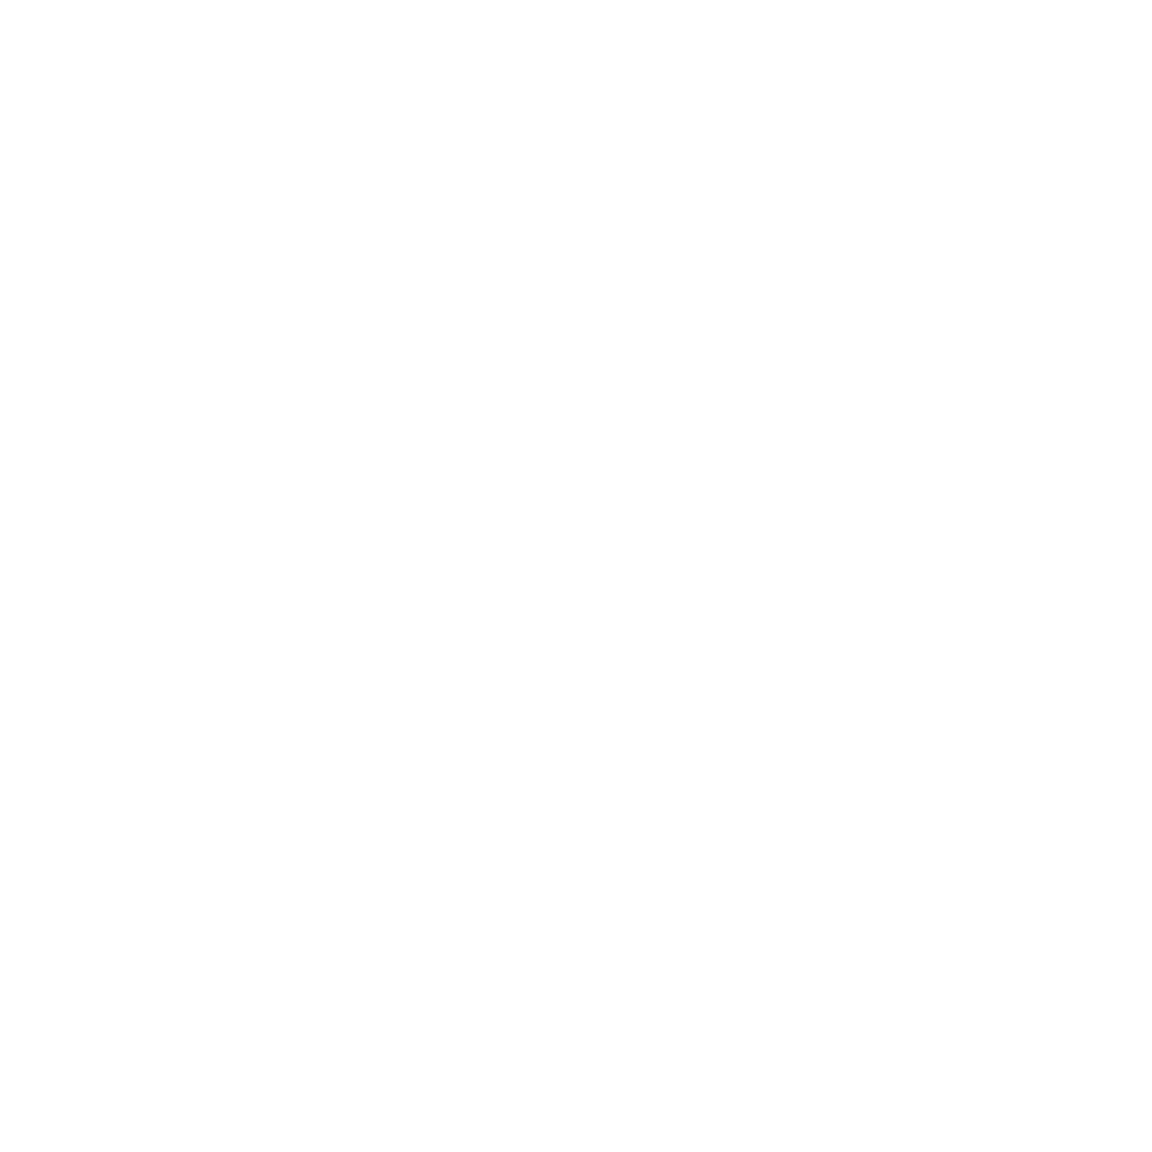

In [11]:
# BS - just out of sheer curiosity, I want to plot both ridge regressions on the same 3-D plot

fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

# BS - predictions for the original data
ax.plot(X1, X2, y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5, label="original data")

ax.scatter(mesh[:,0], mesh[:,1], y_pred_ridge_mesh_gscv, 
          facecolor=(0,0,0,0), s=20, 
          edgecolor='#70b3f0', label="predicted target (gscv)")

ax.scatter(mesh[:,0], mesh[:,1], y_pred_ridgecv_mesh, 
          facecolor=(0,0,0,0), s=20, 
          edgecolor='#b80f0f', label="predicted target (ridgecv)")

ax.set_title("Ridge regression from GSCV and RidgeCV")
ax.set_xlabel('feature 1', fontsize=12)
ax.set_ylabel('feature 2', fontsize=12)
ax.set_zlabel('Target', fontsize=12)
ax.legend()
ax.view_init(elev=28, azim=120)
plt.show()

...just what I thought, it looks like the same regression (at least as my eyes can tell). But I did use nearly identical alphas...

#### Part 5

<IPython.core.display.Javascript object>


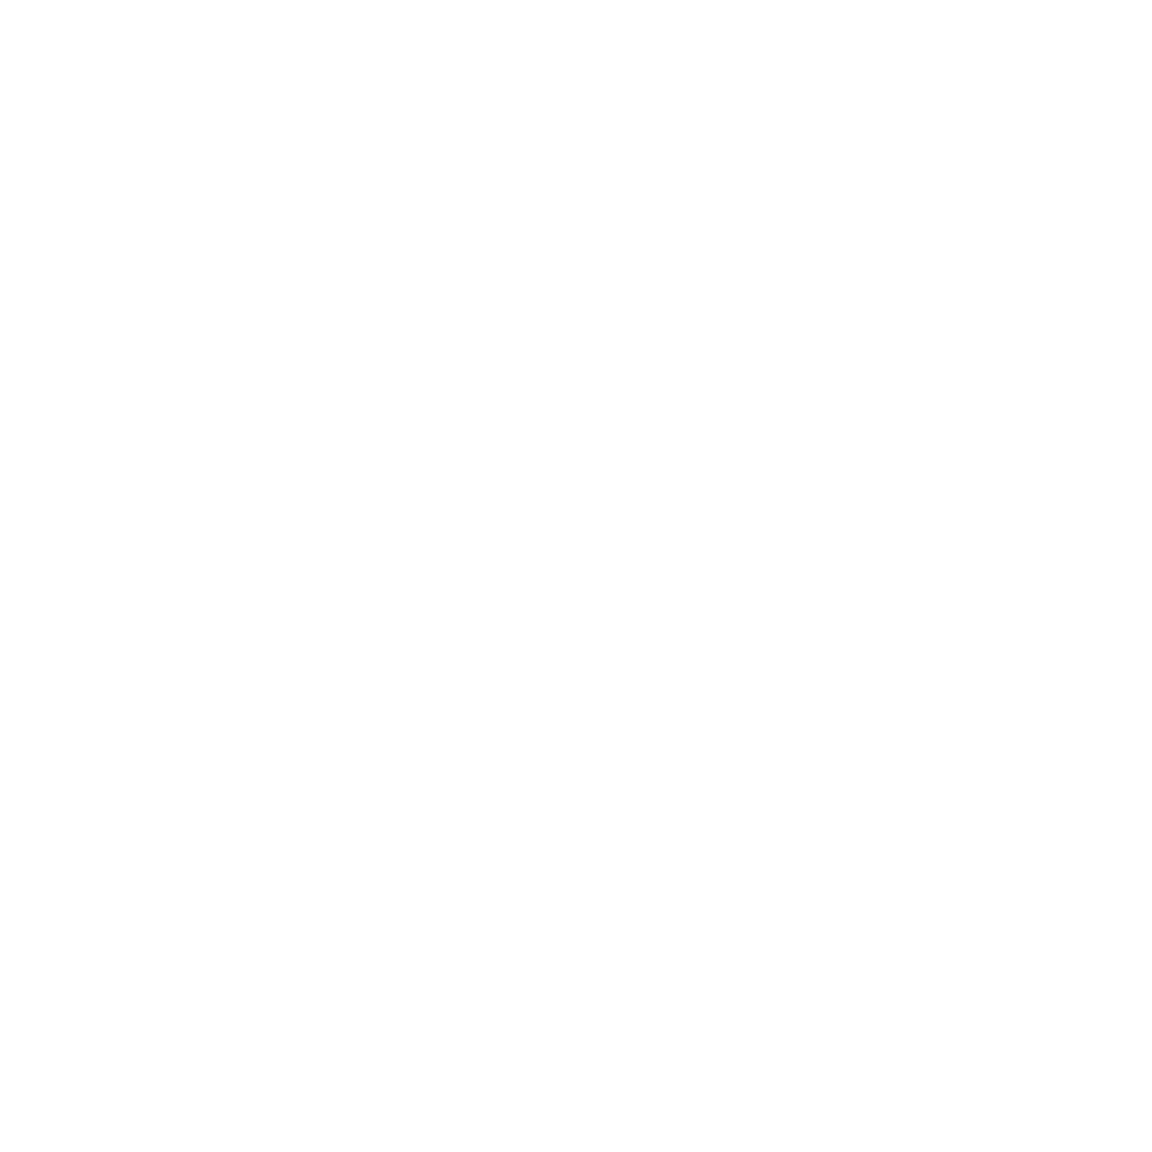

<IPython.core.display.Javascript object>


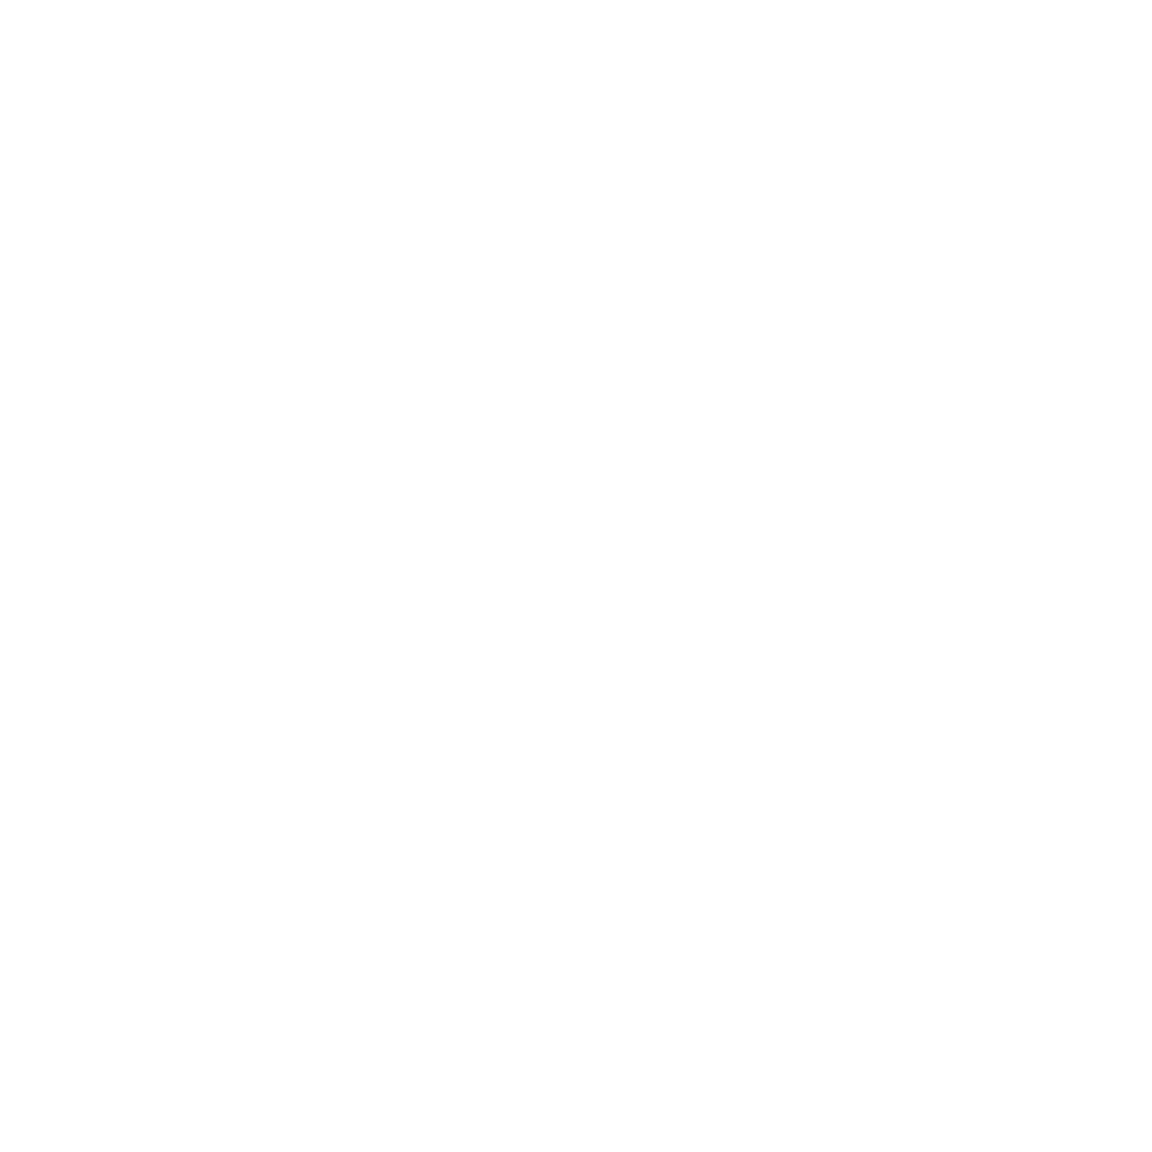

In [12]:
# BS - just to be safe
%matplotlib inline

# BS import the NW package
from astroML.linear_model import NadarayaWatson

# BS - create the model object with the requested 
# parameters and fit it to the data and mesh
NW_model = NadarayaWatson('gaussian', h=0.2)
NW_model.fit(X, y, dy)
y_NW = NW_model.predict(X)
y_NW_grid = NW_model.predict(mesh)


# BS - turn on 3D-ification
%matplotlib notebook 
 
# BS - predictions for the original data
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X1, X2, y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.2, label="original data")
ax.scatter(X[:,0], X[:,1], y_NW, 
          facecolor=(0,0,0,0), s=20, 
          edgecolor='#70b3f0', label="predicted target (original data)")
ax.set_title("Nadaraya Watson regression, original data")
ax.set_xlabel('feature 1', fontsize=12)
ax.set_ylabel('feature 2', fontsize=12)
ax.set_zlabel('Target', fontsize=12)
ax.legend()

ax.view_init(elev=28, azim=120)
plt.show()

# BS - predictions for the whole mesh
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X1, X2, y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.2, label="original data")
ax.scatter(mesh[:,0], mesh[:,1], y_NW_grid, 
          facecolor=(0,0,0,0), s=20, 
          edgecolor='#70b3f0', label="predicted target (entire mesh)")
ax.set_xlabel('feature 1', fontsize=12)
ax.set_ylabel('feature 2', fontsize=12)
ax.set_zlabel('Target', fontsize=12)
ax.set_title("Nadaraya Watson regression, whole mesh")
ax.legend()
             
ax.view_init(elev=28, azim=120)
plt.show()



#### Part 6

<IPython.core.display.Javascript object>


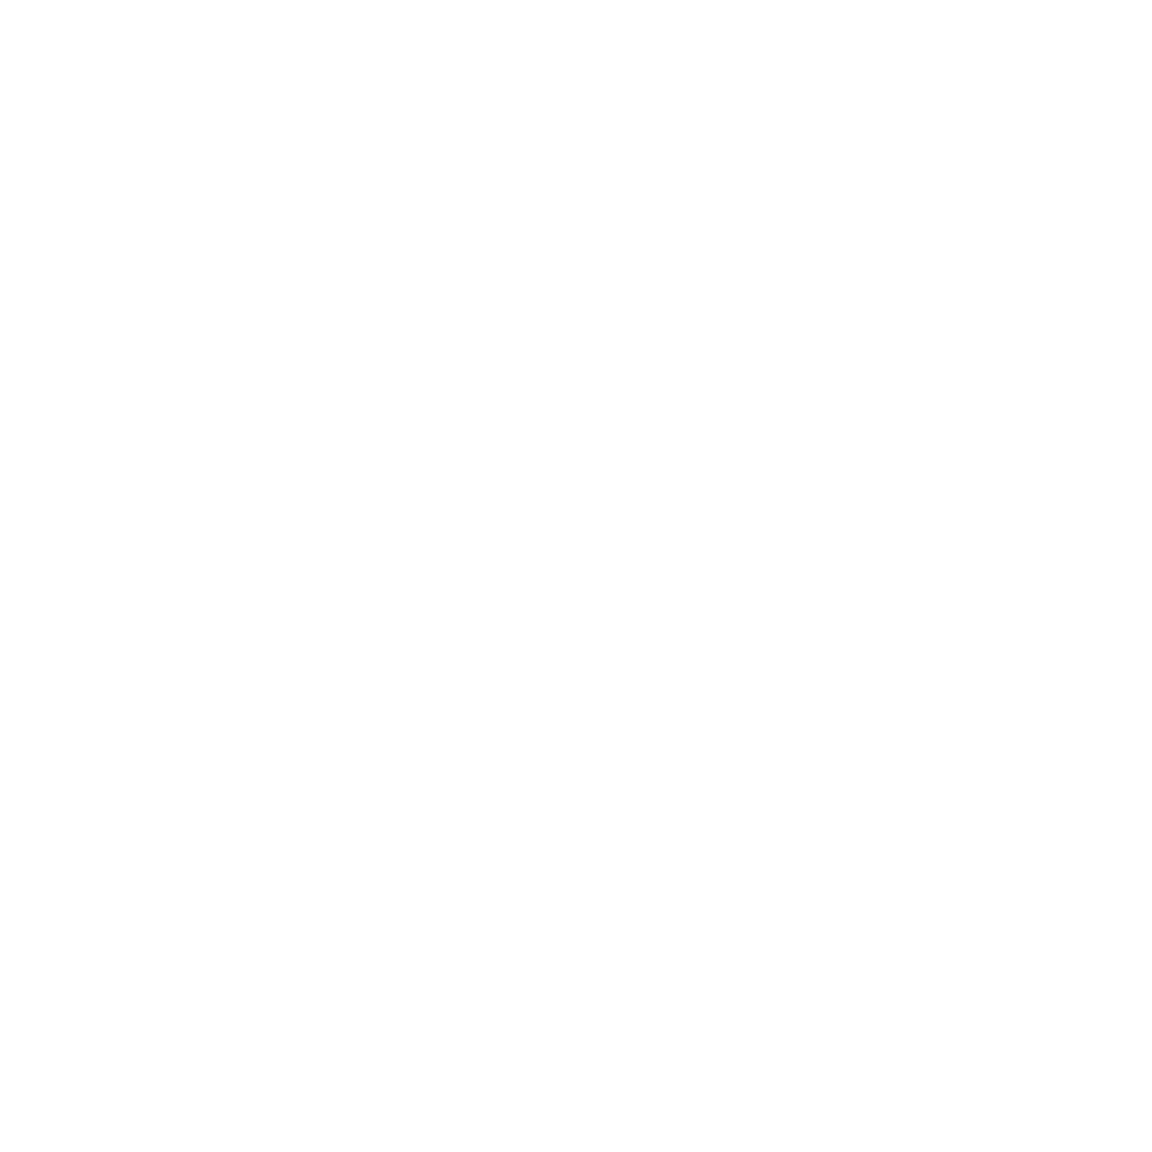

In [13]:
# BS - NOTE - from here on out, I am ony going to plot the predictions for the entire
# mesh only unless otherwise specified

# BS - just to be safe
%matplotlib inline

# BS - import the Gaussian Processes packages
from sklearn.gaussian_process import GaussianProcessRegressor, kernels

# BS - create the model object and fit assuming no error (default kernel is none from docs)
gp_model_noerr = GaussianProcessRegressor(kernel=None, alpha=0)
gp_model_noerr.fit(X, y)
y_gpne_mesh = gp_model_noerr.predict(mesh)

# BS - turn on 3D-ification
%matplotlib notebook 

# BS - predictions for the whole mesh

fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X1, X2, y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.2, label='original data')
ax.scatter(mesh[:,0], mesh[:,1], y_gpne_mesh,
          facecolor=(0,0,0,0), s=20, 
          edgecolor='#70b3f0', label='predicted target (entire mesh)')
ax.set_xlabel('feature 1', fontsize=12)
ax.set_ylabel('feature 2', fontsize=12)
ax.set_zlabel('Target', fontsize=12)
ax.set_title("Gaussian Process regression w/ no errors, whole mesh")
ax.legend()
ax.view_init(elev=28, azim=120)
plt.show()




Looks like it is having some issues fitting those corners...

<IPython.core.display.Javascript object>


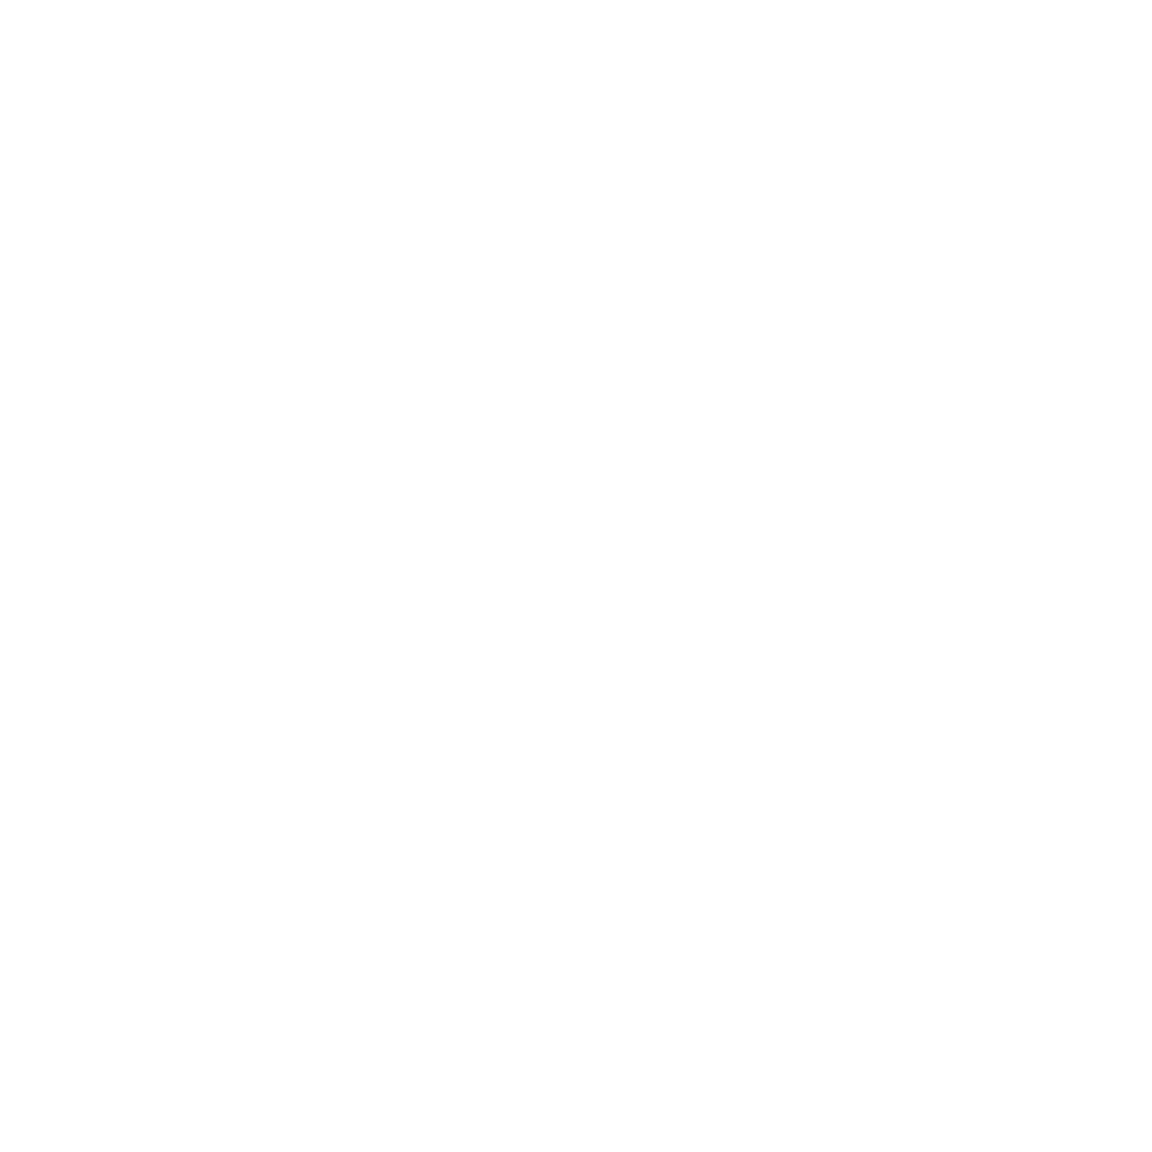

In [14]:
# BS - just to be safe
%matplotlib inline


# BS - create the model object and fit assuming WITH error
gp_model_err = GaussianProcessRegressor(kernel=None, alpha=(dy/y)**2)
gp_model_err.fit(X, y)
y_gp_err_mesh = gp_model_err.predict(mesh)

# BS - turn on 3D-ification
%matplotlib notebook 


# BS - plot the predicted values over the mesh
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X1, X2, y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.2, label='original data')
ax.scatter(mesh[:,0], mesh[:,1], y_gp_err_mesh,
          facecolor=(0,0,0,0), s=20, 
          edgecolor='#70b3f0', label='predicted target (entire mesh)')
ax.set_xlabel('feature 1', fontsize=12)
ax.set_ylabel('feature 2', fontsize=12)
ax.set_zlabel('Target', fontsize=12)
ax.set_title("Gaussian Process regression WITH errors, whole mesh")

ax.view_init(elev=28, azim=120)
plt.show()

That is looking a little better!

#### Part 7

4th degree polynomial coefficients are 49.988758, 0.554313, -0.207866, and 0.286537


<IPython.core.display.Javascript object>


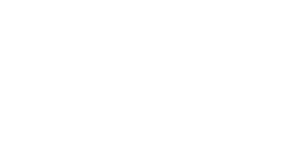

In [15]:
# BS - just to be safe
%matplotlib inline

# BS - import the polynomial regression package from astroML
from astroML.linear_model import PolynomialRegression

# BS - set the degree and fit the model
degree = 4
poly_model = PolynomialRegression(degree) 
poly_model.fit(X, y, y_error=dy)

# BS - print the coefficients
print("4th degree polynomial coefficients are %f, %f, %f, and %f" %(poly_model.coef_[0], poly_model.coef_[1], 
     poly_model.coef_[2], poly_model.coef_[3]))

# BS - predict targets with mesh inputs
y_pred_poly_mesh = poly_model.predict(mesh)


# BS - turn on 3D-ification
%matplotlib notebook 


# BS - predictions for the whole mesh for polynomial fit
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X1, X2, y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.2, label='original data')
ax.scatter(mesh[:,0], mesh[:,1], y_pred_poly_mesh,
          facecolor=(0,0,0,0), s=20, 
          edgecolor='#70b3f0', label='predicted target (entire mesh)')
ax.set_xlabel('feature 1', fontsize=12)
ax.set_ylabel('feature 2', fontsize=12)
ax.set_zlabel('Target', fontsize=12)
ax.set_title("4th degree polynomial fit, whole mesh")
ax.legend()
ax.view_init(elev=28, azim=120)
plt.show()

#### Part 8

In [16]:
# BS - just to be safe
%matplotlib inline

# BS - import the train-test-split package (holy cow this is useful...)
from sklearn.model_selection import train_test_split

# BS - split into test and training sets for X, y, and dy, test set is 0.2 and training set is 0.8 of the data
X_train, X_test, y_train, y_test, dy_train, dy_test = train_test_split(X, y, dy, test_size=0.2, random_state=0)

# BS - of the training set, split into a training set and cross validation set
X_train, X_crossval, y_train, y_crossval, dy_train, dy_crossval \
        = train_test_split(X_train, y_train, dy_train, test_size=0.2, random_state=0)


# BS - this should give us a test set of 100 points (20% of 500), a training set of 320
# (80% of 80% of 500), and a cross-validation set of 80 (20% of 80% of 500) 

# BS - also, I didn't realize before I set the seed that I would get different models selected
# below through the randomization of the train_test_split function. I was getting anywhere from a
# 2nd to 6th degree polynomial with the best cross-validation BIC. Really neat!


8. Sticking with polynomial fitting, let's find the optimal hyper-parameters through cross-validation. 
- Using `sklearn.model_selection.train_test_split`, first do a train-test split with a `test_size` of $20\%$. Then split out a $20\%$ cross-validation set from the training set (leaving a somewhat smaller set to use for training). Note that you'll need to simultaneously split out `yerr` as well by just providing this as another array to `train_test_split`.
- Compute the training and cross-validation rms errors (and from those, the BIC values) as a function of polynomial degree from $1$ to $10$ inclusive. Plot the rms errors and BIC values as a function of the polynomial degree. 
- Choose the optimal polynomial degree, and train on all training data from the first `train_test_split` operation. Predict the labels of the held-out test set, and finally compute the testing rms error.

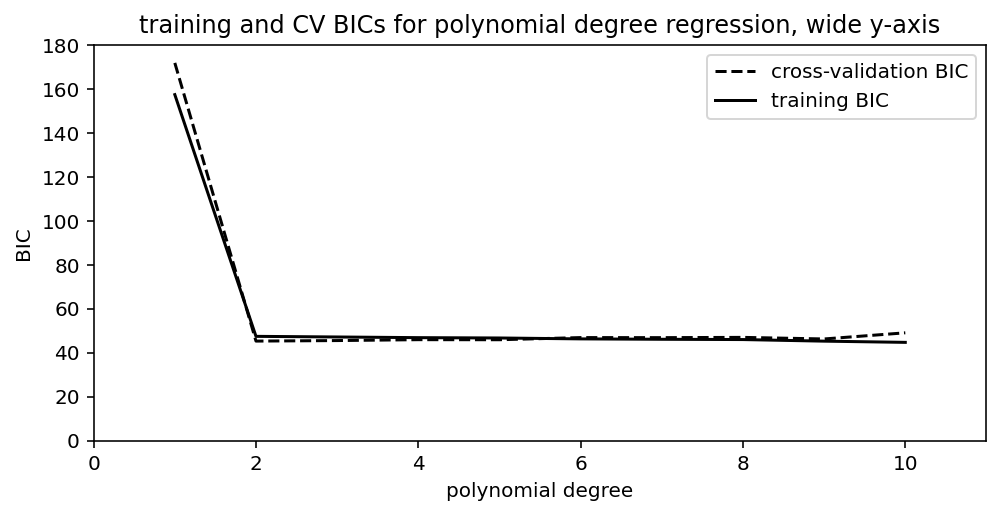

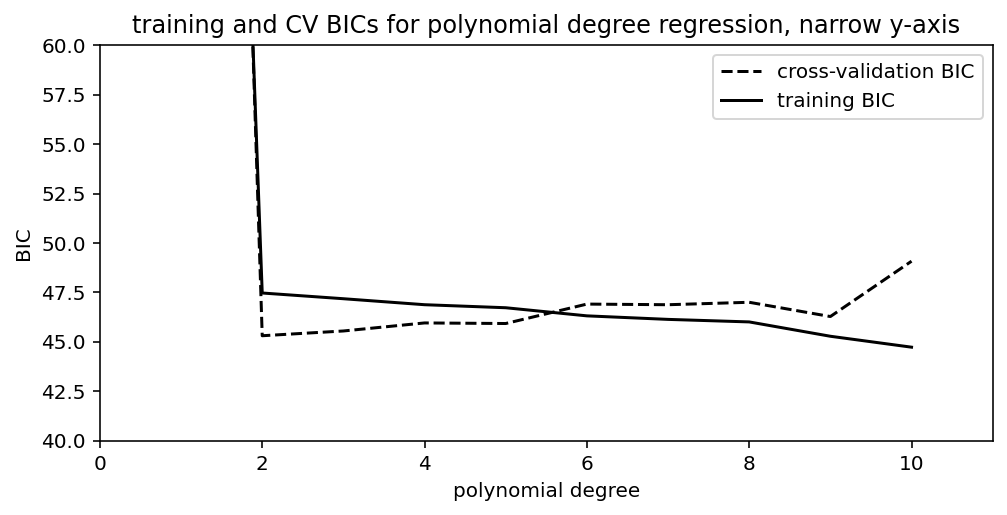

In [17]:
# BS - just to be safe
%matplotlib inline

# BS - array of polynomial degrees to test
degs = np.arange(1, 11, 1)

# BS - create arrays that will store the BICs for the training and 
# cross-validation data for each of the degrees
Bic_t = []
Bic_c = []

# BS - loop through each degree, fit the model, calculate the training and 
# cross-validation errors, calculate their BICs, and append
for i in degs:
    
    # BS - create and fit the polynomial model of degree i to the training data
    poly_model = PolynomialRegression(i)
    poly_model.fit(X_train, y_train, y_error=dy_train)
    
    # BS - predict the targets of the training data and the cross-validation data
    # from the model trained on just the training data
    y_train_pred = poly_model.predict(X_train)
    y_crossval_pred = poly_model.predict(X_crossval)
    
    # BS - calculate the training and cross-validation errors.
    # Because the data has individual (assumed heteroscedastic) errors, 
    # the each point in the sum of squares is weighted by the error 
    training_err = np.sqrt((np.sum(((y_train - y_train_pred)/dy_train)**2)) /len(y_train))
    crossval_err = np.sqrt((np.sum(((y_crossval - y_crossval_pred)/dy_crossval)**2)) /len(y_crossval))

    # BS - calculate the scaled training and cross-validation BICs
    BIC_train = np.sqrt(len(y)) * training_err + degree * np.log(len(y))
    BIC_crossval = np.sqrt(len(y)) * crossval_err + degree * np.log(len(y))
    
    # BS - append to the array
    Bic_t.append(BIC_train)
    Bic_c.append(BIC_crossval)

# BS - plot the BIC's (adoped from lecture 17)
# NOTE: plotted twice - first to get the entire y-range esp. at lower degrees
# second to get the form of the BIC after that initial big dip

# BS - plot 1
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(211)
ax.plot(degs, Bic_c, '--k', label='cross-validation BIC')
ax.plot(degs, Bic_t, '-k', label='training BIC')

ax.set_xlim(0, 11)
ax.set_ylim(0, 180)

ax.legend(loc=1)
ax.set_title("training and CV BICs for polynomial degree regression, wide y-axis")
ax.set_xlabel('polynomial degree')
ax.set_ylabel('BIC')

plt.show()

# BS - plot 2
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(211)
ax.plot(degs, Bic_c, '--k', label='cross-validation BIC')
ax.plot(degs, Bic_t, '-k', label='training BIC')

ax.set_xlim(0, 11)
ax.set_ylim(40, 60)

ax.legend(loc=1)
ax.set_title("training and CV BICs for polynomial degree regression, narrow y-axis")
ax.set_xlabel('polynomial degree')
ax.set_ylabel('BIC')
plt.show()

SRT: Mostly good, Bill. Couple of issues. First is that the question asked to plot the rms training and cv errors as well as the BIC. I only see the BIC here. The other is that the BIC values flatten rather than make a definite dip because you use a variable `degree` that is not defined within the scope of this cell. I'm not sure where it comes from, but it's throwing things off. If you had used `i` here instead then it would work, giving you a definite dip at `2`. -3

In [24]:
# BS - find and print the degree with the lowest cross-validation BIC

best_deg = degs[np.argmin(Bic_c)]

print("Based on my cross-validation BIC, %i is the polynomial degree to go with!" %best_deg)

# BS - fit the polynomial model to this degree on the training data
poly_model_bd = PolynomialRegression(best_deg)
poly_model_bd.fit(X_train, y_train, y_error=dy_train)

# BS - from the fit on the training data, predict the testing set values
y_test_pred = poly_model_bd.predict(X_test)

# BS - calculate and print the rms error on the test data
testing_err = np.sqrt((np.sum(((y_test - y_test_pred)/dy_test)**2)) /len(y_test))
print("The rms error for this %i polynomal fit is %.3f" %(best_deg, testing_err))

Based on my cross-validation BIC, 2 is the polynomial degree to go with!
The rms error for this 2 polynomal fit is 0.938


SRT: The question mentioned training on all the data from the first train_test_split operation, but these are the ones from your second operation (you redefined the variables). -1

<IPython.core.display.Javascript object>


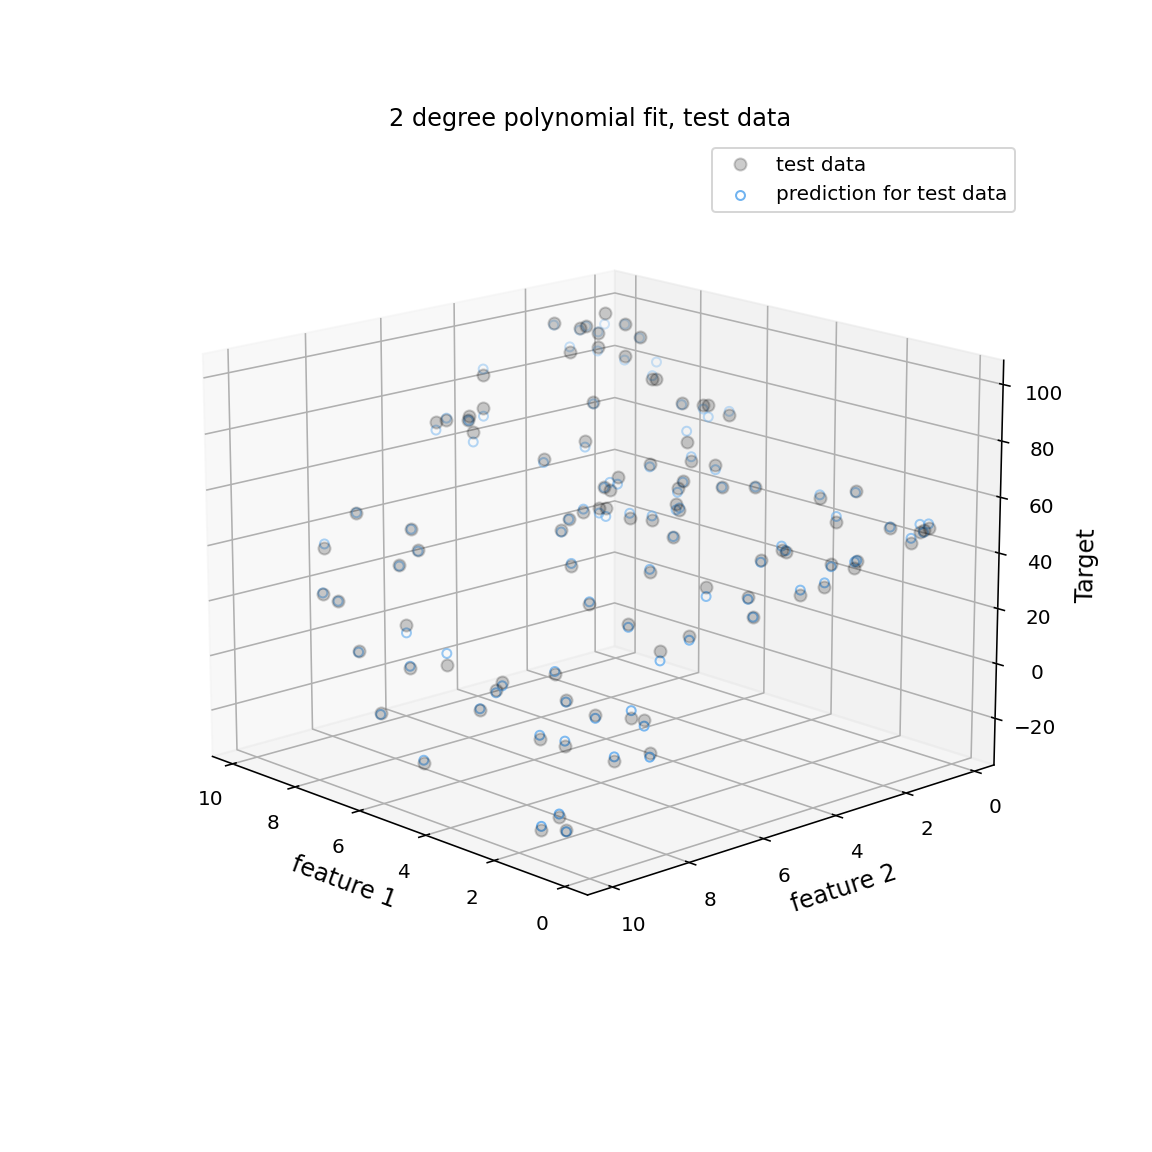

In [26]:
# BS - just to be safe
%matplotlib inline

# BS - plot the 2nd degree polynomial fit to the test data

# BS - turn on 3D-ification
%matplotlib notebook 

# BS - and plot!
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X_test[:,0], X_test[:,1], y_test, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.2, label='test data')
ax.scatter(X_test[:,0], X_test[:,1], y_test_pred,
          facecolor=(0,0,0,0), s=20, 
          edgecolor='#70b3f0', label='prediction for test data')
ax.set_xlabel('feature 1', fontsize=12)
ax.set_ylabel('feature 2', fontsize=12)
ax.set_zlabel('Target', fontsize=12)
ax.set_title("%i degree polynomial fit, test data" %best_deg)

ax.view_init(elev=28, azim=120)
plt.legend()
plt.show()

Not too shabby! 

In retrospect, I probably should have 'functionized' the 3d plotting. That would probably have saved me a lot of lines. ¯\_(ツ)_/¯

SRT: Nice work!